In [1]:
import datacube
from datacube.api import GridWorkflow
from pprint import pprint
import xarray as xr
import numpy as np
from datetime import datetime
from glob import glob
import os
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 8]
from madmex.io.vector_db import VectorDb
from madmex.overlay.conversions import rasterize_xarray
from madmex.overlay.extractions import zonal_stats_xarray
from pprint import pprint

In [2]:
# Load a random storage unit as a xarray dataset
dc = datacube.Datacube()
gw = GridWorkflow(dc.index , product='ls8_espa_mexico')
tile_dict = gw.list_cells(product='ls8_espa_mexico',
                          x=(-104, -102),
                          y=(19, 21),
                          time=(datetime(2017, 1, 1), datetime(2017, 2, 1)))
tile_list = list(tile_dict.items())
sr = gw.load(tile_list[3][1])
print(sr)

<xarray.Dataset>
Dimensions:   (time: 8, x: 3334, y: 3334)
Coordinates:
  * time      (time) datetime64[ns] 2017-01-05T17:12:10.280813 ...
  * y         (y) float64 9.264e+05 9.264e+05 9.263e+05 9.263e+05 9.263e+05 ...
  * x         (x) float64 2.377e+06 2.377e+06 2.378e+06 2.378e+06 2.378e+06 ...
Data variables:
    blue      (time, y, x) int16 -9999 -9999 -9999 -9999 -9999 -9999 -9999 ...
    green     (time, y, x) int16 -9999 -9999 -9999 -9999 -9999 -9999 -9999 ...
    red       (time, y, x) int16 -9999 -9999 -9999 -9999 -9999 -9999 -9999 ...
    nir       (time, y, x) int16 -9999 -9999 -9999 -9999 -9999 -9999 -9999 ...
    swir1     (time, y, x) int16 -9999 -9999 -9999 -9999 -9999 -9999 -9999 ...
    swir2     (time, y, x) int16 -9999 -9999 -9999 -9999 -9999 -9999 -9999 ...
    pixel_qa  (time, y, x) int16 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Attributes:
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...


In [3]:
# Query and load geometries as feature collection
db = VectorDb()
fc = db.load_training_from_dataset(sr)
pprint(fc[0])

(0.001) SELECT version(); args=None
(0.018) SELECT postgis_lib_version(); args=None
(0.061) SELECT "madmex_trainobject"."id", "madmex_trainobject"."the_geom"::bytea, "madmex_trainobject"."added", "madmex_trainobject"."dataset" FROM "madmex_trainobject" WHERE "madmex_trainobject"."the_geom" @ ST_GeomFromEWKB('\x0103000020e6100000010000000500000079a4bca36acb59c0b1574dddec62334079a4bca36acb59c082969225d74a3440c433291cc78d59c082969225d74a3440c433291cc78d59c0b1574dddec62334079a4bca36acb59c0b1574dddec623340'::bytea); args=(<django.contrib.gis.db.backends.postgis.adapter.PostGISAdapter object at 0x7f169f729278>,)
(0.004) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2812; args=(2812,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madm

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2694; args=(2694,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2695; args=(2695,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2696; args=(2696,)
(0.000) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2664; args=(2664,)
(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2665; args=(2665,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2666; args=(2666,)
(0.000) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2684; args=(2684,)
(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2708; args=(2708,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2709; args=(2709,)
(0.000) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2720; args=(2720,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2721; args=(2721,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2725; args=(2725,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2887; args=(2887,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2746; args=(2746,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2747; args=(2747,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2773; args=(2773,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2774; args=(2774,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2775; args=(2775,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2790; args=(2790,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2791; args=(2791,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2792; args=(2792,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2824; args=(2824,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2840; args=(2840,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2841; args=(2841,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2867; args=(2867,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2868; args=(2868,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 2869; args=(2869,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6308; args=(6308,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6309; args=(6309,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6310; args=(6310,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6368; args=(6368,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6331; args=(6331,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6332; args=(6332,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6294; args=(6294,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6378; args=(6378,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6379; args=(6379,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6343; args=(6343,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6344; args=(6344,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6345; args=(6345,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6259; args=(6259,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6260; args=(6260,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6261; args=(6261,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6316; args=(6316,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6317; args=(6317,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6353; args=(6353,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6404; args=(6404,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6405; args=(6405,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 6406; args=(6406,)
(0.001) SELECT "madmex_traintag"."id", "madmex_tr

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 32999; args=(32999,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33000; args=(33000,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33001; args=(33001,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15138; args=(15138,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15139; args=(15139,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15140; args=(15140,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 63926; args=(63926,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15164; args=(15164,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 63927; args=(63927,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15184; args=(15184,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15185; args=(15185,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15186; args=(15186,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15209; args=(15209,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15210; args=(15210,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15211; args=(15211,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15235; args=(15235,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15236; args=(15236,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15237; args=(15237,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13783; args=(13783,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13750; args=(13750,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13751; args=(13751,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15270; args=(15270,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15271; args=(15271,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15272; args=(15272,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15296; args=(15296,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15297; args=(15297,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15298; args=(15298,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13757; args=(13757,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13761; args=(13761,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13762; args=(13762,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15336; args=(15336,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15337; args=(15337,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 15338; args=(15338,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20317; args=(20317,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20318; args=(20318,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20319; args=(20319,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13765; args=(13765,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13915; args=(13915,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13916; args=(13916,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13782; args=(13782,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13785; args=(13785,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13786; args=(13786,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13930; args=(13930,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13809; args=(13809,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13810; args=(13810,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13857; args=(13857,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13858; args=(13858,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13833; args=(13833,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13867; args=(13867,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13868; args=(13868,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13869; args=(13869,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13889; args=(13889,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20204; args=(20204,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13890; args=(13890,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13911; args=(13911,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13912; args=(13912,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13913; args=(13913,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13954; args=(13954,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13955; args=(13955,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 13956; args=(13956,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20323; args=(20323,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20324; args=(20324,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20325; args=(20325,)
(0.000) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61074; args=(61074,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61075; args=(61075,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61076; args=(61076,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20198; args=(20198,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20199; args=(20199,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20200; args=(20200,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20226; args=(20226,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20230; args=(20230,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20231; args=(20231,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20270; args=(20270,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20271; args=(20271,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20272; args=(20272,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.002) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20295; args=(20295,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20296; args=(20296,)
(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20300; args=(20300,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20338; args=(20338,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20339; args=(20339,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20343; args=(20343,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20353; args=(20353,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20366; args=(20366,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61116; args=(61116,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20393; args=(20393,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 20394; args=(20394,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61120; args=(61120,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61095; args=(61095,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61096; args=(61096,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61097; args=(61097,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47109; args=(47109,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47110; args=(47110,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33110; args=(33110,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47042; args=(47042,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47115; args=(47115,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47116; args=(47116,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33051; args=(33051,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33052; args=(33052,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33059; args=(33059,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61133; args=(61133,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33012; args=(33012,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33013; args=(33013,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33165; args=(33165,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61141; args=(61141,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33174; args=(33174,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33009; args=(33009,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33010; args=(33010,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33011; args=(33011,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33113; args=(33113,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33120; args=(33120,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33093; args=(33093,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33124; args=(33124,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33134; args=(33134,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33135; args=(33135,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33167; args=(33167,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33168; args=(33168,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33169; args=(33169,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33198; args=(33198,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33199; args=(33199,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 33200; args=(33200,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61171; args=(61171,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61172; args=(61172,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61173; args=(61173,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64063; args=(64063,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64064; args=(64064,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64065; args=(64065,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61202; args=(61202,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61203; args=(61203,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61204; args=(61204,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47080; args=(47080,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47081; args=(47081,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 46997; args=(46997,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55304; args=(55304,)
(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55305; args=(55305,)
(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55306; args=(55306,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 46970; args=(46970,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 46971; args=(46971,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 46972; args=(46972,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 46986; args=(46986,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 46987; args=(46987,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 46988; args=(46988,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47031; args=(47031,)
(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47035; args=(47035,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47036; args=(47036,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47074; args=(47074,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47088; args=(47088,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47091; args=(47091,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47119; args=(47119,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47120; args=(47120,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 47121; args=(47121,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61219; args=(61219,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61220; args=(61220,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61221; args=(61221,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61241; args=(61241,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61242; args=(61242,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61243; args=(61243,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61265; args=(61265,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61266; args=(61266,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61267; args=(61267,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53434; args=(53434,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53442; args=(53442,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53437; args=(53437,)
(0.000) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 63987; args=(63987,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 63988; args=(63988,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55540; args=(55540,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61307; args=(61307,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53344; args=(53344,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53345; args=(53345,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53297; args=(53297,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53298; args=(53298,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53299; args=(53299,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53363; args=(53363,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53364; args=(53364,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53266; args=(53266,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53307; args=(53307,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53323; args=(53323,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53324; args=(53324,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53376; args=(53376,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53377; args=(53377,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53404; args=(53404,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.000) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53409; args=(53409,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53410; args=(53410,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53411; args=(53411,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53422; args=(53422,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53432; args=(53432,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53441; args=(53441,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53464; args=(53464,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53465; args=(53465,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 53466; args=(53466,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55326; args=(55326,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55327; args=(55327,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55328; args=(55328,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55368; args=(55368,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55369; args=(55369,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55370; args=(55370,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55323; args=(55323,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55312; args=(55312,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55313; args=(55313,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55374; args=(55374,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55375; args=(55375,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55376; args=(55376,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55417; args=(55417,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55409; args=(55409,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55410; args=(55410,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55450; args=(55450,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55451; args=(55451,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55452; args=(55452,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55480; args=(55480,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55481; args=(55481,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55484; args=(55484,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55505; args=(55505,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55506; args=(55506,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55507; args=(55507,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55547; args=(55547,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55548; args=(55548,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 55549; args=(55549,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61222; args=(61222,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61223; args=(61223,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 61273; args=(61273,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 63949; args=(63949,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 63950; args=(63950,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 63951; args=(63951,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64010; args=(64010,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64011; args=(64011,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 63990; args=(63990,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64029; args=(64029,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64030; args=(64030,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64059; args=(64059,)
(0.001) SELECT "madmex_traintag"."id", "mad

(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64084; args=(64084,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64085; args=(64085,)
(0.001) SELECT "madmex_traintag"."id", "madmex_traintag"."key", "madmex_traintag"."value" FROM "madmex_traintag" INNER JOIN "madmex_trainobject_training_tags" ON ("madmex_traintag"."id" = "madmex_trainobject_training_tags"."traintag_id") WHERE "madmex_trainobject_training_tags"."trainobject_id" = 64068; args=(64068,)
(0.001) SELECT "madmex_traintag"."id", "mad

{'geometry': {'coordinates': [[[2389345.0697760475, 829916.9089726309],
                               [2389379.9445535257, 829916.2561768177],
                               [2389379.758288379, 829906.2322022521],
                               [2389394.7045930866, 829905.9525042864],
                               [2389394.4252454266, 829890.9164919537],
                               [2389399.407313714, 829890.823292797],
                               [2389399.314131189, 829885.8112551064],
                               [2389394.332062901, 829885.9045548239],
                               [2389394.238880379, 829880.8926176714],
                               [2389389.2568120775, 829880.985816811],
                               [2389389.163629542, 829875.9738796359],
                               [2389374.217324651, 829876.2535775675],
                               [2389374.4035898307, 829886.277552456],
                               [2389369.42152154, 829886.3708521198],
    

In [4]:
# Rasterize feature collection
fc_raster = rasterize_xarray(fc, sr)
print(fc_raster)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


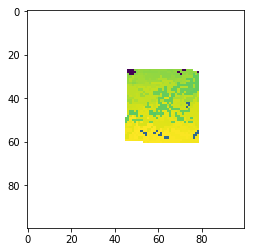

In [5]:
plt.imshow(fc_raster[3000:3100, 500:600])
plt.show()

In [6]:
zonal_stats_xarray(fc_raster, sr, 'mean')


<xarray.Dataset>
Dimensions:      (features_id: 2162)
Coordinates:
  * features_id  (features_id) float64 1.0 2.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
Data variables:
    blue         (features_id) float64 -7.375e+03 -7.286e+03 -7.324e+03 ...
    green        (features_id) float64 -7.336e+03 -7.194e+03 -7.241e+03 ...
    red          (features_id) float64 -7.305e+03 -7.085e+03 -7.15e+03 ...
    nir          (features_id) float64 -7.048e+03 -6.794e+03 -6.855e+03 ...
    swir1        (features_id) float64 -6.988e+03 -6.689e+03 -6.724e+03 ...
    swir2        (features_id) float64 -7.144e+03 -6.947e+03 -6.983e+03 ...
    pixel_qa     (features_id) float64 81.25 81.25 81.25 81.25 81.25 81.25 ...